<h1> Clustering Algorithms <h1>

<h2> Unsupervised Learning </h2>
The main feature of unsupervised learning algorithms, when compared to classification and regression methods, is that input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the structure of the data without any assistance. This creates two main differences. First, it allows us to process large amounts of data because the data does not need to be manually labeled. Second, it is difficult to evaluate the quality of an unsupervised algorithm due to the absence of an explicit goodness metric as used in supervised learning.

<h2> What is clustering? </h2>

Clustering is one of the solutions to unsupervised learning problems where we don't know the labels for the dataset.
<p>Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

<h3> Types of Clustering </h3>
<ul>
    <li> Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not. For example, clustering students into 10 groups where a student belongs to exactly one group </li>
    <li> Soft Clustering: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, clustering students into 10 groups with the probability of each student of being present in all 10 groups. </li>
</ul>

<h3> Applications of Clustering </h3>
<ol>
    <li> Cluster documents in multiple categories based on tags, topics, and the content of the document.</li>
    <li> Finding optimum locations of stores or warehouse for optimal cost and time of delivery. e.g. Amazon warehouses. </li>
    <li> Clustering helps marketers improve their customer base, work on target areas, and segment customers based on purchase history, interests, or activity monitoring. </li>
    <li> Analyzing player stats has always been a critical element of the sporting world, and with increasing competition, machine learning has a critical role to play here. </li>
    <li> Machine learning has a critical role to play in fraud detection and has numerous applications in automobile, healthcare, and insurance fraud detection. </li>
    <li> The publicly available Uber ride information dataset provides a large amount of valuable data around traffic, transit time, peak pickup localities, and more. </li>
    <li> Cyber-profiling is the process of collecting data from individuals and groups to identify significant co-relations. </li>
</ol>

Different Types of Clustering

![Clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

## KMeans

<h3> How does KMeans Work </h3>

A very good visualisation is available
[here](http://web.stanford.edu/class/ee103/visualizations/kmeans/kmeans.html) and [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

Let's try KMeans on a dataset of wholesale customers from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers)

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../data/wholesale/train.csv')

In [3]:
df.head().T

,0,1,2,3,4
Channel,2,2,2,1,2
Region,3,3,3,3,3
Fresh,12669,7057,6353,13265,22615
Milk,9656,9810,8808,1196,5410
Grocery,7561,9568,7684,4221,7198
Frozen,214,1762,2405,6404,3915
Detergents_Paper,2674,3293,3516,507,1777
Delicassen,1338,1776,7844,1788,5185


<h4> Data Description </h4>
<ol>
    <li> FRESH: annual spending (m.u.) on fresh products (Continuous) </li>
    <li> MILK: annual spending (m.u.) on milk products (Continuous) </li>
    <li> GROCERY: annual spending (m.u.)on grocery products (Continuous) </li>
    <li> FROZEN: annual spending (m.u.)on frozen products (Continuous) </li>
    <li> DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) </li>
    <li> DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous) </li>
    <li> CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) </li>
    <li> REGION: customers Region “ Lisnon, Oporto or Other (Nominal) </li>
</ol>

We see that Channel and Region are categorical variables, so we will convert them to numbers using pandas category data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since a lot of the data is continuous, to give equal importance to all features, we need to scale everything between 0 and 1

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [7]:
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
km = KMeans(n_clusters=5).fit(df_transformed)

In [9]:
df['label'] = km.labels_

In [10]:
df.label.unique()

array([0, 1, 2, 3, 4])

<h3> Finding the best number of clusters </h3>
We define <b>best</b> situation as when the distance between points of the same cluster in minimum and distance between the points of different clusters is maximum. So we will use the Sum of squared distances of samples to their closest cluster center as the metric to identify the optimum number of clusters.<br>
We will plot the metric and look for an elbow after which the decrement in the distances is minimal. This method is called elbow method.

In [11]:
cluster_list = range(1, 15)
ssd = []
for n_clusters in cluster_list:
    km = KMeans(n_clusters=n_clusters).fit(df_transformed)
    ssd.append(km.inertia_)

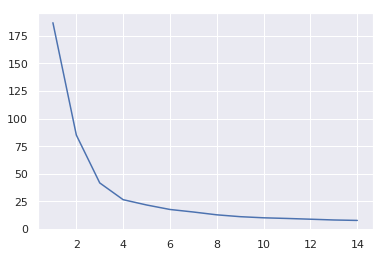

In [12]:
sns.lineplot(y=ssd, x=cluster_list, markers=True)